- 피어슨 상관계수 (r)
  - 극단값에 민감
- 스피어만 상관계수 (ρ)
  - 순위 기반이라 이상치 영향 적음

- 원본 데이터
  - r 정상 값
  - ρ 정상 값

- min, max 조작
  - r 변화
  - ρ 비교적 덜 변함

- 극단치 추가
  - r 급격히 깨짐
  - ρ 여전히 안정적

데이터에 이상치를 조금씩 추가하면서 피어슨 & 스피어만 상관계수 값 변화를 확인하자. 왜 스피어만이 이상치에 강한지 직접 체감해보자.

In [ ]:
import numpy as np

# 원본 데이터
od_data = np.array([10, 12, 14, 14, 15, 16, 16, 18, 19, 20, 21, 22, 25, 28, 30, 35])

# 수정된 min, max 데이터 (to 이상치 영향 체크)
modi_data = np.array([5, 12, 14, 14, 15, 16, 16, 18, 19, 20, 21, 22, 25, 28, 30, 50])

# 극단값 추가한 데이터 (to 상관계수 민감도 비교)
extended_data = np.array([5, 12, 14, 14, 15, 16, 16, 18, 19, 20, 21, 22, 25, 28, 30, 50, 55, 56, 70])

- Q1 = 하위 25% 지점 값
- Q3 = 상위 75% 지점 값
- IQR = Q3 - Q1 (중간 50% 범위 폭)

Q1, Q3, IQR 을 계산하여 이상치 판별 기준을 정하자. 데이터가 Q1 보다 너무 작거나 (= `lower_bound` 보다 작은 경우), Q3 보다 너무 크면 (= `upper_bound` 보다 큰 경우) 이상치로 판단한다. = 통계적으로 기준 선을 만들어서 이상치를 명확히 구분

In [ ]:
# 이상치 계산 전 Q1, Q3, IQR & 이상치 탐지 기준 선 계산

# 분위 수 (Q1, Q3) 측정
def cal_iqr(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1 # 사분위 범위

  # 이상치 탐지 기준 선 계산
  # 범위 1.5 = 통상적인 수치, 이상치 탐지할 때 데이터에 따라 범위 조정 가능
  lower_bound = Q1 - 1.5 * IQR # 이상치 하한
  upper_bound = Q3 + 1.5 * IQR # 이상치 상한

  # 데이터 내에서 이상치 탐지
  outliers = data[(data < lower_bound) | (data > upper_bound)]

  # 결과 반환
  return {
      'Data Count': len(data),
      'Q1': Q1,
      'Q3': Q3,
      'IQR': IQR,
      'Lower Bound': lower_bound,
      'Upprt Bound': upper_bound,
      'Outliers': outliers
  }

dataset = {
    'Original Data': od_data,
    'Modified Data': modi_data,
    'Extended Data': extended_data
}

# 결과 저장
results = {}

for name, data in dataset.items():
  results[name] = cal_iqr(data)

# 출력 비교
for name, result in results.items():
  print(f'====={name}====')
  for key, value in result.items():
      print(f'{key}: {value}')
  print('\n')

=====Original Data====
Data Count: 16
Q1: 14.75
Q3: 22.75
IQR: 8.0
Lower Bound: 2.75
Upprt Bound: 34.75
Outliers: [35]


=====Modified Data====
Data Count: 16
Q1: 14.75
Q3: 22.75
IQR: 8.0
Lower Bound: 2.75
Upprt Bound: 34.75
Outliers: [50]


=====Extended Data====
Data Count: 19
Q1: 15.5
Q3: 29.0
IQR: 13.5
Lower Bound: -4.75
Upprt Bound: 49.25
Outliers: [50 55 56 70]




In [ ]:
# `modi_data` 의 0번째 백분위수 값 = 최솟값
np.percentile(modi_data, 0)

np.float64(5.0)

연속형, 순서형, 명목형 데이터에 대한 상관계수 차이를 실험하자.

- 피어슨 상관계수 (r)
  - 연속형 데이터 간 선형관계 측정
  - 수치 자체에 민감 (특히 이상치)
- 스피어만 (ρ)
  - 순서형 데이터나 비선형 단조관계 (= 변수가 한쪽 방향으로만 계속 증가/ 감소) 측정
  - 순위 기반, 좀 더 robust (= 이상치나 데이터 왜곡에 덜 민감)
- 켄달 타우 상관계수 (τ)
  - 순서쌍 일치 (= 같은 순서 방향)/ 불일치 (= 서로 뒤바꾼 순서) 정도로 민감도 비교
  - 순서쌍 비교라서 '순서 관계 왜곡' 에 민감하게 반응
  - 데이터가 작거나 순위 간 교차가 (= 순서쌍 불일치)
 많을수록 차이 더 민감
  - EX. 관측상 i: X=3, Y=7, j: X=5, Y=4 일 때 X는 증가, Y는 감소하여 순서 불일치 (이상치 많으면 불일치쌍 많아짐)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kendalltau, spearmanr

# 난수 생성 (시드 고정)
np.random.seed(111)

# 연속형 데이터 생성
data = pd.DataFrame({
    'X': np.random.normal(0, 1, 100), # 평균 0, 표준편차 1인 정규분포 난수
    'Y': np.random.normal(0, 1, 100), # 다른 정규분포 난수
    'Z': np.random.uniform(0, 1, 100) # 0~1 균등분포 난수
})

# 순서형 데이터 생성
# 사분위수로 등급화
data['ordinal_x'] = pd.qcut(data['X'], q=4, labels=[1, 2, 3, 4])
data['ordinal_y'] = pd.qcut(data['Y'], q=4, labels=[1, 2, 3, 4])

# 명목형 데이터 생성
# 범주형 코드화, 레이블을 문자로 만들고 `.cat.codes` 로 숫자 코드화
data['category_x'] = pd.qcut(data['X'], q=4, labels=['Low', 'Medium', 'High', 'Very High']).cat.codes
data['category_y'] = pd.qcut(data['Y'], q=4, labels=['Low', 'Medium', 'High', 'Very High']).cat.codes

# 연속형 데이터에 대한 피어슨 상관계수
pearson_corr = data[['X', 'Y', 'Z']].corr(method='pearson')
print(pearson_corr)

# 순서형 데이터에 대한 스피어만
spearman_corr = data[['X', 'Y', 'Z', 'ordinal_x', 'ordinal_y']].corr(method='spearman')
print(spearman_corr)

# 순서형 데이터에 대한 켄달 타우 상관계수
kendall_corr = pd.DataFrame(
    [[kendalltau(data[col1], data[col2]).correlation for col2 in data[['X', 'Y', 'Z', 'ordinal_x', 'ordinal_y']]]
    for col1 in data[['X', 'Y', 'Z', 'ordinal_x', 'ordinal_y']]],
    index = ['X', 'Y', 'Z', 'ordinal_x', 'ordinal_y'],
    columns = ['X', 'Y', 'Z', 'ordinal_x', 'ordinal_y']
)

print(kendall_corr)

          X         Y         Z
X  1.000000 -0.078266  0.030989
Y -0.078266  1.000000  0.024038
Z  0.030989  0.024038  1.000000
                  X         Y         Z  ordinal_x  ordinal_y
X          1.000000 -0.054701  0.035116   0.968294  -0.014253
Y         -0.054701  1.000000  0.029991  -0.030985   0.968294
Z          0.035116  0.029991  1.000000   0.045549   0.046478
ordinal_x  0.968294 -0.030985  0.045549   1.000000   0.024000
ordinal_y -0.014253  0.968294  0.046478   0.024000   1.000000
                  X         Y         Z  ordinal_x  ordinal_y
X          1.000000 -0.037172  0.026263   0.870388  -0.009284
Y         -0.037172  1.000000  0.016970  -0.024139   0.870388
Z          0.026263  0.016970  1.000000   0.037601   0.037137
ordinal_x  0.870388 -0.024139  0.037601   1.000000   0.017333
ordinal_y -0.009284  0.870388  0.037137   0.017333   1.000000


In [ ]:
# 결과 각각 확인
# 피어슨
data[['X', 'Y', 'Z']].corr(method='pearson')

,X,Y,Z
X,1.000000,-0.078266,0.030989
Y,-0.078266,1.000000,0.024038
Z,0.030989,0.024038,1.000000


- 피어슨 결과 인사이트
  - X, Y 상관계수 -0.078
    - 거의 0, 선형관계 없음
    - 즉, X가 커진다고 해서 Y가 일정하게 커지거나 작아지는 경향 없음
  - X, Z 상관계수 0.031
    - 거의 0, 선형관계 없음
  - Y, Z 상관계수 0.024
    - 거의 0, 선형관계 없음

피어슨 r 값으로 선형관계만 확인했을 때 X, Y, Z 사이 선형적 상관관계 거의 없음, 변수 간 선형적 예측력도 없을 것임

비선형 관계는 피어슨에서 알 수 없음 = 스피어만이나 켄달 타우로 봐야 함

In [ ]:
# 스피어만
data[['X', 'Y', 'Z', 'ordinal_x', 'ordinal_y']].corr(method='spearman')

,X,Y,Z,ordinal_x,ordinal_y
X,1.000000,-0.054701,0.035116,0.968294,-0.014253
Y,-0.054701,1.000000,0.029991,-0.030985,0.968294
Z,0.035116,0.029991,1.000000,0.045549,0.046478
ordinal_x,0.968294,-0.030985,0.045549,1.000000,0.024000
ordinal_y,-0.014253,0.968294,0.046478,0.024000,1.000000


- 스피어만 결과 인사이트
  - X, ordinal_x 상관계수 0.968
    - 거의 1에 가까움 = ordinal_x가 X 순위를 이용해 만든 순서형 변수니까 순위 기반 상관은 거의 완벽
    - 다만 사분위수 구간으로 나눴으니까 1은 아님
  - Y, ordinal_y 상관계수 0.968
    - 순위 일치도 거의 완벽
  - X, Y 상관계수 -0.054
    - 여전히 거의 0
    - X, Y는 순위 기반 단조관계도 없음
    - 선형 관계 없음 + 단조관계도 없음
  - Z와 다른 애들
    - 전부 약함 (0.03~0.04 수준)
    - Z는 자기 제외 모든 변수랑 순위 기반 상관관계 없음

피어슨, 스피어만 모두 X, Y, Z 서로 선형관계도 없고, 순위 기반 단조관계도 없음

ordinal_x, ordinal_y 는 원래 변수랑 강한 순위 상관

Z는 모든 변수랑 거의 무관

In [ ]:
# 켄달
pd.DataFrame(
[[kendalltau(data[col1], data[col2]).correlation for col2 in data[['X', 'Y', 'Z', 'ordinal_x', 'ordinal_y']]]
  for col1 in data[['X', 'Y', 'Z', 'ordinal_x', 'ordinal_y']]],
  index = ['X', 'Y', 'Z', 'ordinal_x', 'ordinal_y'],
  columns = ['X', 'Y', 'Z', 'ordinal_x', 'ordinal)y']
)

,X,Y,Z,ordinal_x,ordinal)y
X,1.000000,-0.037172,0.026263,0.870388,-0.009284
Y,-0.037172,1.000000,0.016970,-0.024139,0.870388
Z,0.026263,0.016970,1.000000,0.037601,0.037137
ordinal_x,0.870388,-0.024139,0.037601,1.000000,0.017333
ordinal_y,-0.009284,0.870388,0.037137,0.017333,1.000000


- 켄달 타우 상관계수 결과 인사이트
  - X, ordinal_x 상관계수 0.870
    - 강한 양의 상관
    - ordinal_x는 X로부터 사분위 순위로 만든 거니까 당연히 순서쌍 거의 일치
  - Y, ordinal_y 상관계수 0.870
    - 순위 일치 거의 완벽
  - X, Y 상관계수 -0.037
    - 거의 0
    - X, Y 순서쌍 일치도 거의 없음, 단조관계 없음 (= 증가할수록 같이 증가/ 감소)
  - X, Z & Y, Z 상관계수 0.02~0.03
    - 거의 0
    - Z는 여전히 다른 변수와 거의 무관

켄달이 스피어만보다 값이 더 낮게 나옴 = 스케일 특성 상 수치 범위 작게 나옴

상관계수 행렬 히트맵으로 피어슨 상관계수 시각화하자.

추후 스피어만, 켄달도 시각화한다면 어떤 변수쌍에서 상관계수가 강한지, 약한지 & 값 크기 차이, 민감도 차이 확인 가능

<Axes: >

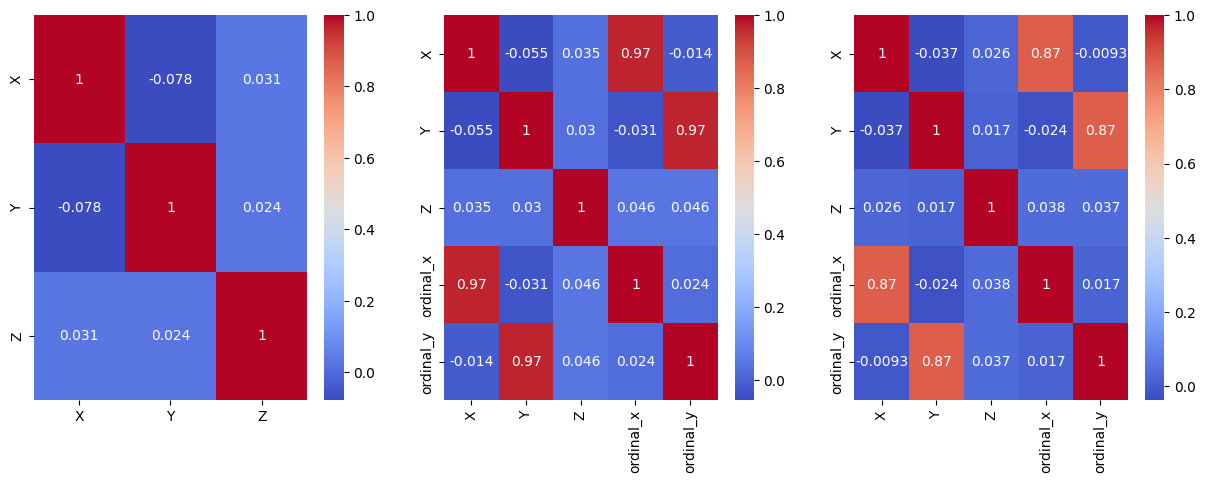

In [ ]:
# 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 5))

# 피어슨 상관계수 히트맵
plt.subplot(1, 3, 1) # 1행 3열 첫번째 칸
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')

# 스피어만 상관계수 히트맵
plt.subplot(1, 3, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')

# 켄달 타우 상관계수 히트맵
plt.subplot(1, 3, 3)
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm')

In [ ]:
import pandas as pd
import numpy as np

# 예제 데이터셋 생성: 직원 연령, 근속연수, 급여, 부서
np.random.seed(0)
n = 100 # 직원 수

# 가상 데이터프레임 생성
data = pd.DataFrame({
    'age': np.random.normal(35, 10, n).astype(int),          # 평균 35세, 표준편차 10인 정규분포
    'tenure': np.random.exponential(5, n).round(1),          # 평균 5년 근속 지수분포
    'salary': np.random.normal(50000, 8000, n).astype(int),  # 연봉 평균 5만달러, 표준편차 8000만 달러 정규분포
    'department': np.random.choice(['HR', 'IT', 'Sales'], n) # 부서 3개 중 랜덤 선택
})

print(data.head())

   age  tenure  salary department
0   52     2.8   41726      Sales
1   39     4.7   55452         HR
2   44     0.1   43572         IT
3   57     1.8   44483         IT
4   53     5.4   46355         HR


In [ ]:
# 연속형 변수들의 기초 통계량
data.describe()

,age,tenure,salary
count,100.000000,100.000000,100.000000
mean,35.090000,4.878000,48657.390000
std,10.128562,5.125389,7600.195837
min,9.000000,0.100000,27819.000000
25%,28.000000,1.475000,44170.000000
50%,35.500000,3.750000,48781.500000
75%,42.000000,6.325000,53930.250000
max,57.000000,33.800000,68074.000000


In [ ]:
# 각 부서 별 인원 수
data['department'].value_counts()

,count
department,
Sales,39
IT,32
HR,29


In [ ]:
# 피어슨 상관계수 행렬 계산
numerics_cols = ['age', 'tenure', 'salary']
corr_matrix = data[numerics_cols].corr()

print(corr_matrix)

             age    tenure    salary
age     1.000000 -0.089895  0.018112
tenure -0.089895  1.000000 -0.037769
salary  0.018112 -0.037769  1.000000


- age, tenure 상관계수 -0.090
  - 약한 음의 상관
  - 나이 많다고 근속연수 긴 선형관계 없음
- age, salary 상관계수 0.018
  - 거의 무관
  - 나이 많다고 연봉 더 높은 것 아님
- tenure, salary 상관계수 -0.038
  - 거의 무관
  - 오래 다닌다고 연봉 더 높은 것 아님

현재 데이터에서는 나이, 근속연수, 연봉 사이 **선형관계** 거의 없음

비선형 단조관계 있을 수 있으니 스피어만, 켄달도 돌려봐야 함

이상치 있으면 재확인 필요, 이상치 탐지 하고 제거 후 다시 상관분석 해야 함

<Axes: >

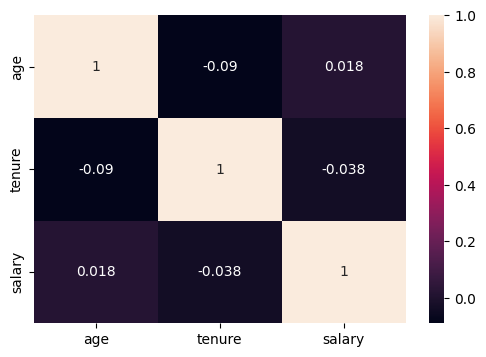

In [ ]:
# 피어슨 상관계수 결과 시각화
# 1. 히트맵

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 4))
sns.heatmap(corr_matrix, annot=True)

전체적으로 색상이 거의 다 어두움 = 상관 거의 없음

변수 간 선형관계 거의 없음을 직관적으로 바로 알 수 있음

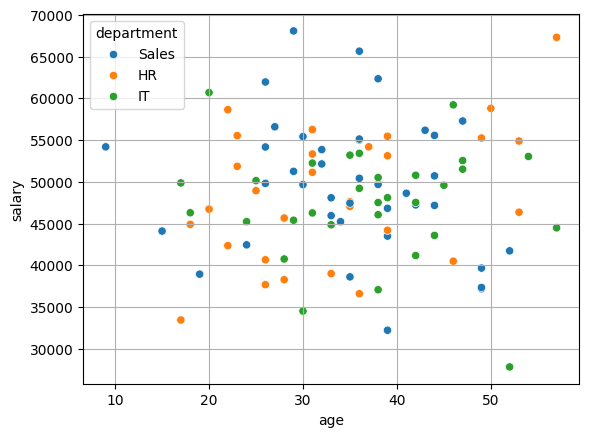

In [ ]:
# 2. 산점도
# 나이, 급여 관계를 부서 별로 색깔로 구분

sns.scatterplot(data=data, x='age', y='salary', hue='department')
plt.grid(True)
plt.show()

- age, salary 사이 뚜렷한 선형관계 없음 = 점들이 랜덤하게 퍼져 있음
- 세 부서가 비슷한 급여 내에서 고르게 분포
- 특정 연령대에서 급여가 확 튀는 데이터가 있음 = 이상치?
- 나이 25 ~ 45, 급여 40000 ~ 60000 구간에 점 밀집

- 결과 인사이트
  - 나이가 많다고 급여가 무조건 높지는 않음 = 피어슨 상관계수 결과와 일치
  - 부서 별로 급여 분포가 눈에 띄게 다른 것 같지는 않음
     - 정확히 부서 별 평균, ANOVA 검정 필요
  - 일부 이상치 존재 가능 = 이상치 탐지 따로 해보는 게 좋음 (Boxplot or IQR)

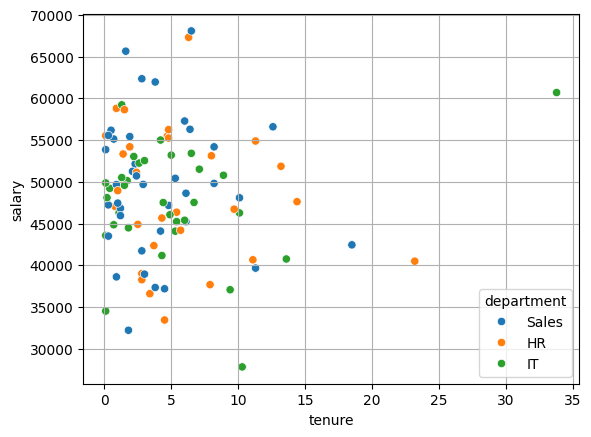

In [ ]:
# 근속 기간, 급여 관계를 부서 별로 색깔로 구분

sns.scatterplot(data=data, x='tenure', y='salary', hue='department')
plt.grid(True)
plt.show()

- 대부분 직원들의 tenure가 0~10년 사이
- 10년 이상 근무자 소수
- 근속연수 늘어나도 급여 일정하게 증가하는 패턴 거의 안 보임 (뚜렷한 우상향 없음)
- 부서 별로 근속연수-급여 관계에 뚜렷한 차이 시각적으로 안 보임 = 색깔 고르게 퍼짐
- 30년 근속인데 낮은 급여 = 특이
- 0 ~ 5년 근속, 급여 40000 ~ 60000 구간에 데이터 밀집

- 결과 인사이트
  - tenure, salary 선형관계 없음 = 피어슨 상관계수 결과와 일치
  - 부서 별 특이한 차이 없음
  - 몇몇 극단값 존재 = IQR로 이상치 제거 후 상관관계 재확인 가능
  - 부서 별 평균 급여 차이를 groupby, ANOVA 검정으로 분석 가능

## **만약 선형적인 데이터 관계라면?**

- to 상관관계 없는 데이터 & 선형관계 있는 데이터 비교
- to 피어슨, 스피어만, 켄달 각각의 민감도 차이 비교

하기 위해 나이 & 근속연수, 급여 간 선형관계 강하게 심어둔 데이터를 이전 데이터와 비교해서 상관계수 값 변화를 체감해보자.

In [ ]:
import pandas as pd
import numpy as np

# 예제 데이터: 직원 연령, 근속연수, 급여, 부서
np.random.seed(0)
n = 100

# age -> salary, tenure 상관성 있게 만들기 = 비례하는 선형식으로 생성
ages = np.random.normal(35, 10, n).astype(int) # 평균 35세, 표준편차 10
tenures = np.clip((ages-20)*0.4 + np.random.normal(0, 2, n), 0, None).round(1) # + 랜덤값해서 원래의 선형 관계 100% 그대로 따르지 않도록 약간의 무작위 오차 (= 노이즈) 삽입, to 현실 세계 데이터처럼 보이게 하려고
salaries = (ages*1200 + tenures*1500 + np.random.normal(0, 3000, n)).astype(int)

data = pd.DataFrame({
    'age': ages,
    'tenure': tenures,
    'salary': salaries,
    'department': np.random.choice(['HR', 'IT', 'Sales'], n)
})

data

,age,tenure,salary,department
0,52,16.6,86192,Sales
1,39,4.9,53431,HR
2,44,7.1,66748,IT
3,57,16.7,95415,Sales
4,53,10.9,81870,HR
...,...,...,...,...
95,42,8.5,66560,Sales
96,35,7.5,53543,IT
97,52,14.4,85748,Sales
98,36,10.7,58051,IT


In [ ]:
# 기초 통계량
data.describe()

,age,tenure,salary
count,100.000000,100.000000,100.000000
mean,35.090000,6.423000,51564.300000
std,10.128562,4.375664,18724.263263
min,9.000000,0.000000,7932.000000
25%,28.000000,3.400000,37119.000000
50%,35.500000,6.250000,52682.500000
75%,42.000000,9.850000,64500.250000
max,57.000000,16.700000,95415.000000


In [ ]:
# 피어슨 상관계수 행렬 계산
numerics_cols = ['age', 'tenure', 'salary']
corr_matrix = data[numerics_cols].corr()

<Axes: >

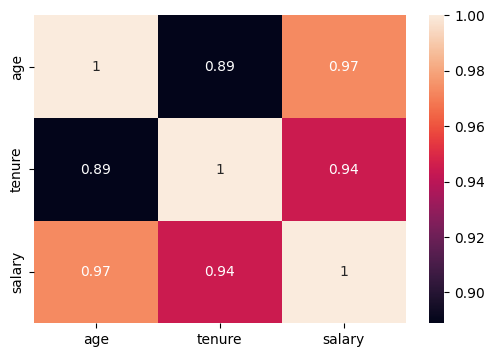

In [ ]:
# 피어슨 상관계수 결과 시각화
# 1. 히트맵

import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 4))
sns.heatmap(corr_matrix, annot=True)

- age, tenure 상관계수 0.89
  - 나이 많을수록 근속연수 긺 = 강한 양의 선형관계
- age, salary 상관계수 0.97
  - 나이 많을수록 급여 높음 = 매우 강한 양의 선형관계
- tenure, salary 상관계수 0.94
  - 근속 오래할수록 급여 높음 = 강한 양의 선형관계

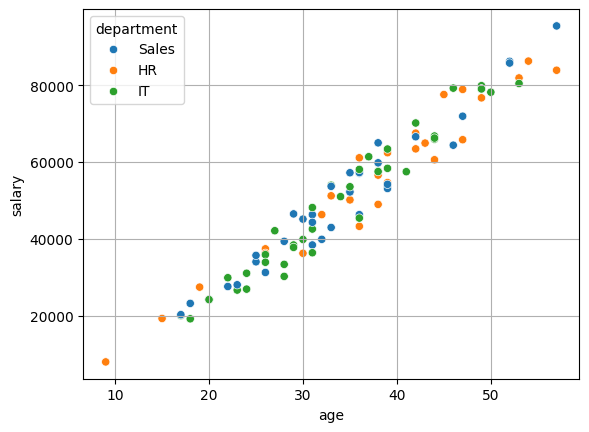

In [ ]:
# 2. 산점도
# 나이, 급여 관계를 부서 별로 색깔로 구분

sns.scatterplot(data=data, x='age', y='salary', hue='department')
plt.grid(True)
plt.show()

- 명확한 우상향 패턴 = 강한 양의 선형관계
- 세 부서 모두 비슷한 분포 = 부서에 따른 급여 차이 거의 없음, 현재 부서 변수를 랜덤으로 배정했기 때문임 (= 실험 결과에 따라 값이 결정되는 변수, 결과가 확률에 따라 정해지는 숫자)
- 살짝 퍼지긴 했지만 노이즈 영향, 현실적인 데이터 같이 살짝 퍼짐

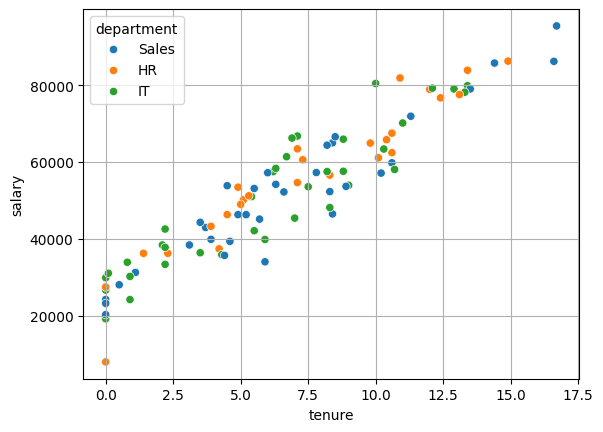

In [ ]:
# 근속 기간, 급여 관계를 부서 별로 색깔로 구분

sns.scatterplot(data=data, x='tenure', y='salary', hue='department')
plt.grid(True)
plt.show()

- 명확한 우상향 패턴 = 강한 양의 선형관계
- tenure 짧을수록 급여 낮고, tenure 길수록 급여 높음
- 세 부서 모두 비슷한 경향성 = 부서에 따른 차이 시각적으로 없음
- 부서 색깔은 구분용일 뿐 실제 부서 효과는 없음